In [1]:
from google.colab import drive
drive.mount("/content/drive")

file_path = ("/content/drive/MyDrive/total_data_na.csv")

Mounted at /content/drive


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler



In [6]:
df = pd.read_csv(file_path)

# Display the structure and content of the dataset
print("Dataset Structure:")
print(df.info())

print("\nDataset Head:")
print(df.head())




Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    object 
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    object 
 20  Econ    143 non-null    float64
 21  SR.y    143 non-null

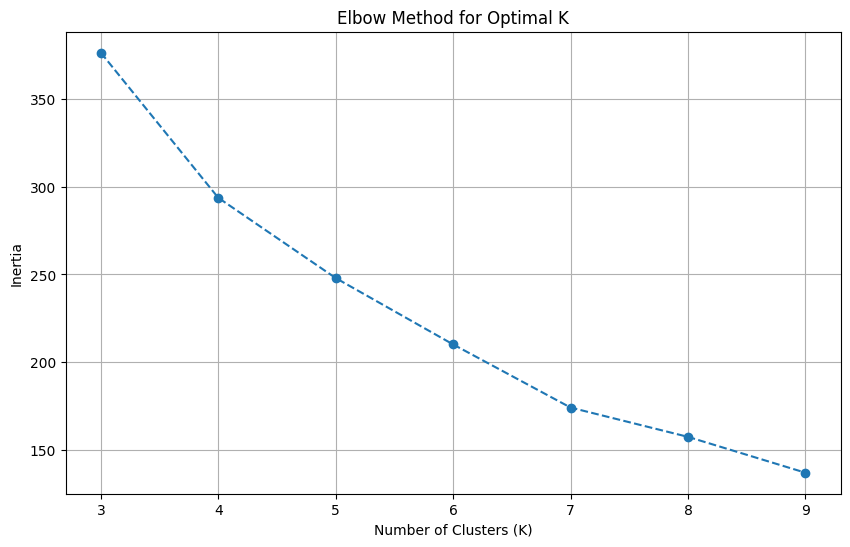

In [23]:
# Handling missing values
df.replace('-', np.nan, inplace=True)
df.fillna(0, inplace=True)

# Select relevant columns for clustering analysis
required_stats = df[['Runs.x', 'Avg.x', 'SR.x', 'Wkts', 'Avg.y', 'SR.y']]

# Scaling the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(required_stats)

# Clustering Analysis
# Experiment with different values of K and evaluate clustering results

inertia = []

for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(3, 10), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [47]:
# Choose the optimal number of clusters based on the elbow curve
opt_k = 4

# Perform K-means clustering with optimal K
kmeans = KMeans(n_clusters=opt_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Add the cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Forming a Balanced Cricket Team
# Now, let's construct a balanced 12-player cricket team based on the clustering results

# Count the number of players in each cluster
cluster_counts = df['Cluster'].value_counts()

# Select players from each cluster to form a balanced team
balanced_team = pd.DataFrame()


for cluster_id, count in cluster_counts.items():
    players_from_cluster = df[df['Cluster'] == cluster_id].head(int(12 / opt_k))
    balanced_team = pd.concat([balanced_team, players_from_cluster])

print("\nBalanced Cricket Team:")
print(balanced_team[['PLAYER', 'Cluster']])


Balanced Cricket Team:
               PLAYER  Cluster
7          Andrew Tye        2
11  Bhuvneshwar Kumar        2
17       Chris Woakes        2
0         Aaron Finch        3
4          Alex Hales        3
12   Brendon McCullum        3
6       Andre Russell        1
8          Axar Patel        1
9         Ben Cutting        1
1      AB de Villiers        0
2     Abhishek Sharma        0
3      Ajinkya Rahane        0


In [59]:
# Top-order batsmen (openers)
openers = balanced_team[balanced_team['Cluster'] == 0]
print("\nTop-order Batsmen (Openers):")
print(openers[['PLAYER', 'Cluster','Runs.x', 'SR.x']])

# Middle-order batsmen (batsmen who typically bat at positions 3 to 6)
middle_order = balanced_team[balanced_team['Cluster'] == 3]
print("\nMiddle-order Batsmen:")
print(middle_order[['PLAYER', 'Cluster' ,'Runs.x', 'SR.x']])

# All-rounders (players proficient in both batting and bowling)
all_rounders = balanced_team[balanced_team['Cluster'] == 2]
print("\nAll-rounders:")
print(all_rounders[['PLAYER', 'Cluster','Runs.x', 'SR.x', 'SR.y', 'Wkts']])

# Bowlers (specialists in bowling)
bowlers = balanced_team[balanced_team['Cluster'] == 1]
print("\nBowlers:")
print(bowlers[['PLAYER', 'Cluster', 'SR.y', 'Wkts']])


Top-order Batsmen (Openers):
            PLAYER  Cluster  Runs.x    SR.x
1   AB de Villiers        0     480  174.54
2  Abhishek Sharma        0      63  190.90
3   Ajinkya Rahane        0     370  118.21

Middle-order Batsmen:
              PLAYER  Cluster  Runs.x    SR.x
0        Aaron Finch        3     134  134.00
4         Alex Hales        3     148  125.42
12  Brendon McCullum        3     127  144.31

All-rounders:
               PLAYER  Cluster  Runs.x   SR.x   SR.y  Wkts
7          Andrew Tye        2      32  84.21     14    24
11  Bhuvneshwar Kumar        2      13  81.25  30.77     9
17       Chris Woakes        2      17  89.47  13.75     8

Bowlers:
          PLAYER  Cluster   SR.y  Wkts
6  Andre Russell        1  17.46    13
8     Axar Patel        1     52     3
9    Ben Cutting        1     51     2
